<h2 style="text-align: center;"><b>Python. Занятие 1: Основы</b></h2>

## Основы Python

### **Задача 1:** 
Создать numpy-массив, состоящий из первых четырех простых чисел, выведите его тип и размер:

In [43]:
# решение
arr = np.array([2, 3, 5, 7])
print(arr)
print(arr.shape)
print(arr.dtype)

[2 3 5 7]
(4,)
int32


### **Задача 2:** 
создать и вывести последовательность чисел от 10 до 32 с постоянным шагом, длина последовательности -- 12. Чему равен шаг?

In [44]:
# решение
arr = np.linspace(10, 32, 12)
print(arr)

[10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32.]


### **Задание 3:**  
- Создать массив чисел от $-4\pi$  до $4\pi $, количество точек 100
- Посчитать сумму поэлементных квадратов синуса и косинуса для данного массива  
- С помощью ``np.all`` проверить, что все элементы равны единице.

In [49]:
# решение
x = np.linspace(-4 * np.pi, 4 * np.pi, 100)
np.all((np.sin(x)**2 + np.cos(x)**2).round() == 1)


True

### ***Задание 4:***
Создать квадратную матрицу размера 8, на главной диаг. арифметическая прогрессия с шагом 3 (начиная с 3), а на побочной -1, остальные элементы 0.

In [93]:
# решение
n=8
a = np.diag(np.arange(3, 3*(n+1),3), k=0)
m=5
for i in range(abs(m),n):
    if m<0:
        a[i-abs(m),i]=-1
    elif m>0 :
        a[i,i-m]=-1
    else:
        a[i,i]
print(a)

[[ 3  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0]
 [ 0  0  0  0 15  0  0  0]
 [-1  0  0  0  0 18  0  0]
 [ 0 -1  0  0  0  0 21  0]
 [ 0  0 -1  0  0  0  0 24]]


## Реальный датасет
Мы будем работать с датасетом ``Титаник``. Файлы необходимо скачать локально или загрузить с помощью функции ниже.
![alt text](https://drive.google.com/uc?id=1Tb52nFFsjI8sqv0AlMpx25aNJ62xzp5w)

Информация о файлах: 
 - *titanic_data.csv* содержит различную информацию о пассажирах Титаника (билет, класс, возраст и т.п.)
 - *titanic_surv.csv* содержит для каждого пассажира из первого файла информацию о том, выжил ли этот пассажир (метка 1) или нет (метка 0)


### Чтение из файла
Обычно данные хранятся в виде таблиц в файлах формата .csv или .xlsx. На этом семинаре мы будем загружать данные из .csv файлов.


 
Загрузим первый файл

In [95]:
# df_1 = pd.read_csv('titanic_data.csv')
import pandas as pd
pass_link = 'https://www.dropbox.com/s/lyzcuxu1pdrw5qb/titanic_data.csv?dl=1'
titanic_passengers = pd.read_csv(pass_link, index_col='PassengerId') # index_col=?

In [96]:
print('Всего пассажиров: ', len(titanic_passengers))
titanic_passengers.head(10)

Всего пассажиров:  891


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


## Задание 2
Сгруппируйте записи по классам пассажиров, в каждой группе посчитайте средний возраст. Используйте метод ``pandas.DataFrame.groupby``.

In [112]:
# решение
titanic_passengers.groupby(['Sex']).mean()


,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,
female,2.159236,27.915709,0.694268,0.649682,44.479818
male,2.389948,30.726645,0.429809,0.235702,25.523893


In [113]:
titanic_passengers.groupby(['Pclass']).mean()


,Age,SibSp,Parch,Fare
Pclass,,,,
1,38.233441,0.416667,0.356481,84.154687
2,29.877630,0.402174,0.380435,20.662183
3,25.140620,0.615071,0.393075,13.675550


## Слияние таблиц
Таблицы можно сливать несколькими способами. Мы рассмотрим слияние по индексу: метод называется ``pd.join``.

In [114]:
# df_2 = pd.read_csv('titanic_surv.csv')
surv_link = 'https://www.dropbox.com/s/v35x9i6a1tc7emm/titanic_surv.csv?dl=1'
df_2 = pd.read_csv(surv_link)

In [115]:
df_2.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Задание 3.
Слейте два датасета по колонке индекса.

In [141]:
# решение
df_2.join(titanic_passengers)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
4,0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,3.0,"Rice, Mrs. William (Margaret Norton)",female,39.0,0.0,5.0,382652,29.1250,NaN,Q
887,1,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0000,NaN,S
888,0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.0000,B42,S
889,1,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.4500,NaN,S


### Задание 4. 
Сколько всего выживших пассажиров? Выживших пассажиров по каждому из полов? Постройте матрицу корреляций факта выживания, пола и возраста.

In [146]:
# решение

df_2.join(titanic_passengers)['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [147]:
df_2.join(titanic_passengers).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,0.010254,-0.003541,-0.012716,-0.016198,0.011044
Pclass,0.010254,1.000000,-0.369650,0.083565,0.018893,-0.549328
Age,-0.003541,-0.369650,1.000000,-0.308195,-0.189044,0.096199
SibSp,-0.012716,0.083565,-0.308195,1.000000,0.414690,0.159430
Parch,-0.016198,0.018893,-0.189044,0.414690,1.000000,0.216020
Fare,0.011044,-0.549328,0.096199,0.159430,0.216020,1.000000


In [132]:
import seaborn as sns

<AxesSubplot:>

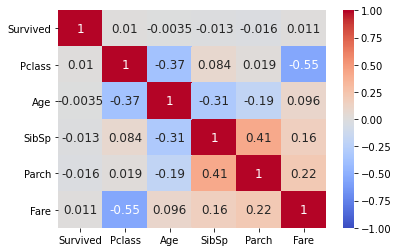

In [150]:
sns.heatmap(df_2.join(titanic_passengers).corr(),
    # сюда нужно подставить матрицу корреляции
    annot=True, cmap='coolwarm',
    vmin=-1, vmax=1,
    annot_kws={"size": 12})